# COGS 118C Assignment 3

Andrew Washington

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1

**a)** N = 256 (samples/sec) * 5 (min) * 60 (sec/min) = **76,800 samples**
   
   T = 5 (min) * 60 (sec/min) = __300 sec__
   
   dt = 1 / (256 (1/sec)) = **3.906 ms**

**b)** **76,800 samples** since the number of samples doesn't change between the time and frequency domain.

**c)** The first nonzero frequency is the frequency associated with T, which is 1/(300 sec) = **0.00333 Hz** or 3.33 mHz

**d)** The Nyquist limit is 1/2 * Fs =  __128 Hz__

**e)** The frequency resolution (df) must be less than (11.6 - 11.5) Hz = 0.1 Hz, so T must be greater than 1/(0.1 Hz) = **10 sec**

# Question 2

# A)

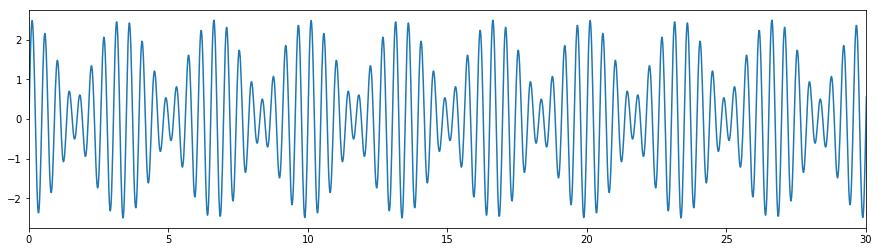

In [2]:
T = 60 # seconds
Fs = 60 # Hz
x = np.arange(0, T, 1/Fs)
F = np.sin(2*np.pi*2*x) + 1.5*np.sin(2*np.pi*x*2.3)

plt.figure(figsize=(15,4))
plt.gca().set_xlim(0,30)
plt.plot(x, F)

# B)

In [3]:
signalRMS = np.std(F)
print("The standard deviation (rms) of the signal is " + 
      str(signalRMS) + " microvolts.")

The standard deviation (rms) of the signal is 1.2747548784 microvolts.


# C)

The equation is 10 = 20*log10(signalRMS / noiseRMS).

Solving for noiseRMS yields noiseRMS = signalRMS / sqrt(10), which is calculated next.

In [4]:
# Part c continued
noiseRMS = signalRMS / np.power(10, 0.5)
print("The standard deviation (rms) of the noise should be " + 
      str(noiseRMS) + " microvolts for a 10 dB SNR." )

The standard deviation (rms) of the noise should be 0.403112887415 microvolts for a 10 dB SNR.


# D)

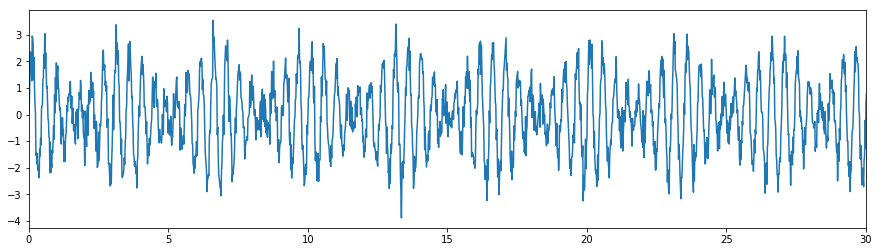

In [5]:
noise = np.random.normal(0, noiseRMS, len(x))
F = F + noise

plt.figure(figsize=(15,4))
plt.gca().set_xlim(0,30)
plt.plot(x, F)

# E)

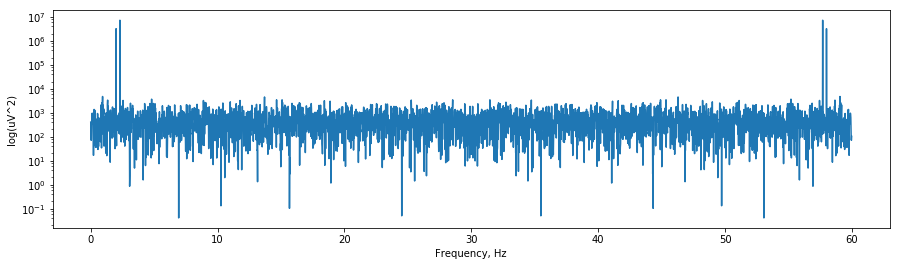

In [6]:
power = np.power(np.absolute(np.fft.fft(F)),2)
plt.figure(figsize=(15,4))
plt.ylabel('log(uV^2)')
plt.xlabel('Frequency, Hz')
plt.semilogy(x, power)

# G)

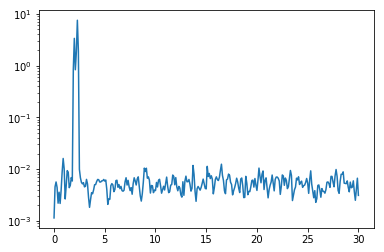

In [7]:
import scipy as sp
from scipy import signal
f, psd = sp.signal.welch(F, Fs, nperseg=10*Fs)
plt.semilogy(f, psd)

# H)

If the goal is low variance, I would prefer to use graph G over graph E, since G would give a much better picture across subjects.  Still, I wouldn't want the frequency resolution to drop too heavily - notice that G already shows a blur between 2 Hz and 2.3 Hz.  Even if it was hypothesized that the two peaks didn't need to be distinguished, I would hesitate before "blurring" the data.